In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df =pd.read_csv('lab10.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [3]:
df=df.drop(['id'],axis=1)
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split


X=df.iloc[:,1:]
Y=df.iloc[:,0]
Xtrain,Xtest,Ytrain,Ytest =train_test_split(X,Y,test_size=0.3,random_state=152)

In [4]:
knn=KNeighborsClassifier().fit(Xtrain,Ytrain)
Ypred=knn.predict(Xtest)

from sklearn.metrics import accuracy_score

cm=confusion_matrix(Ypred,Ytest)
acc=accuracy_score(Ypred,Ytest)
print("the value of confusion matrics and accuracy")
print(cm)
print(acc)

the value of confusion matrics and accuracy
[[102   6]
 [  5  58]]
0.935672514619883


In [5]:
acc_list=[]
acc_list.append(acc)
for k in range(6,40):

    knn=KNeighborsClassifier(n_neighbors=k).fit(Xtrain,Ytrain)
    Ypred=knn.predict(Xtest)
    current=accuracy_score(Ypred,Ytest)
    acc_list.append(current)
    
    
    
# print(len(acc_list))
# print(acc_list)

## finding of value of k usnig accuracy v/s k

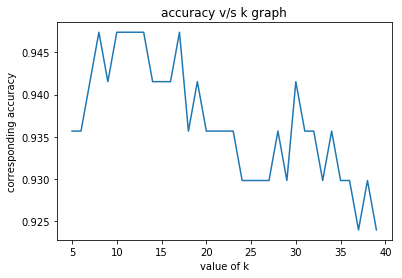

In [6]:

plt.plot(range(5,40),acc_list)
plt.xlabel("value of k")
plt.ylabel("corresponding accuracy")
plt.title("accuracy v/s k graph")
plt.show()
#according to below graph the best value of k is 10

## 10 k fold  verfification method to find the k value

ValueError: Data is not binary and pos_label is not specified

In [1]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=5)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, Y, cv=10)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

NameError: name 'KNeighborsClassifier' is not defined

In [2]:
from sklearn.model_selection import cross_val_score